<a href="https://colab.research.google.com/github/bob8dod/ML-studying/blob/main/ML_DL/14_DL_Model_(Mnist_by_NN_before_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist #Using Mnist Dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical #for One-Hot Encoding
from tensorflow.keras.callbacks import EarlyStopping #Using callbacks

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#seed setting
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#load Mnist Data, data classification
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print("Train Images: %d Test Images: %d" %(X_train.shape[0], X_test.shape[0]))

Train Images: 60000 Test Images: 10000


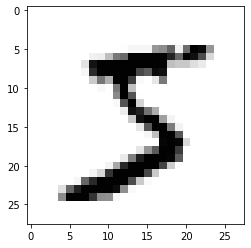

Class: 5


In [ ]:
#Check the Data image
plt.imshow(X_train[0], cmap='Greys')
plt.show()
print("Class: %d" %Y_train[0])

In [ ]:
#Checking Data before preprocessing
for x in X_train[0]: # accessing Row
    for i in x: # accessing Column
        print('{}\t'.format(i),end=' ')      
    print()
print(X_train[0].shape)

0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 
0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 
0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 
0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 
0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 
0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 3	 18	 18	 18	 126	 136	 175	 26	 166	 255	 247	 127	 0	 0	 0	 0	 
0	 0	 0	 0	 0	 0	 0	 0	 30	 36	 94	 154	 170	 253	 253	 253	 253	 253	 225	 172	 253	 242	 195	 64	 0	 0	 0	 0	 
0	 0	 0	 0	 0	 0	 0	 49	 238	 253	 253	 253	 253	 253	 253	 253	 253	 251	 93	 82	 82	 56	 39	 0	 0	 0	 0	 0	 
0	 0	 0	 0	 0	 0	 0	 18	 219	 253	 253	 253	 253	 253	 198	 182	 247	 241	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 
0	 0	 0	 0	 0	 0	 0	 0	 80	 156	 107	 253	 253	 205	 11	 0	 43	 154	 0	 0	 0	 0	 0	 0	 0	 0	 0	 0	 
0	 0	 0	 0	 0	 0	 0	 0	 0	 14	 1	 154	 253

In [ ]:
#Data preprocessing
X_train = X_train.reshape(X_train.shape[0],28*28).astype(float)/255 #Normalization
X_test = X_test.reshape(X_test.shape[0],28*28).astype(float)/255 #Normalization
Y_train = to_categorical(Y_train, 10) #One-Hot Encoding
Y_test = to_categorical(Y_test, 10) #One-Hot Encoding

In [ ]:
#Model making, setting
model = Sequential()
model.add(Dense(512,input_dim=28*28,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Setting callbacks _ EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=10)

In [ ]:
#Operating Model
history = model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=30, batch_size=200, callbacks=[early_stopping])
print("\nAccuracy: %.4f" %(model.evaluate(X_test,Y_test)[1]))

Epoch 1/30
300/300 [==============================] - 5s 14ms/step - loss: 0.5377 - accuracy: 0.8532 - val_loss: 0.1530 - val_accuracy: 0.9575
Epoch 2/30
300/300 [==============================] - 4s 13ms/step - loss: 0.1328 - accuracy: 0.9614 - val_loss: 0.1056 - val_accuracy: 0.9686
Epoch 3/30
300/300 [==============================] - 4s 13ms/step - loss: 0.0879 - accuracy: 0.9747 - val_loss: 0.0815 - val_accuracy: 0.9750
Epoch 4/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0605 - accuracy: 0.9828 - val_loss: 0.0752 - val_accuracy: 0.9762
Epoch 5/30
300/300 [==============================] - 4s 13ms/step - loss: 0.0429 - accuracy: 0.9876 - val_loss: 0.0684 - val_accuracy: 0.9793
Epoch 6/30
300/300 [==============================] - 4s 13ms/step - loss: 0.0334 - accuracy: 0.9909 - val_loss: 0.0682 - val_accuracy: 0.9780
Epoch 7/30
300/300 [==============================] - 4s 15ms/step - loss: 0.0252 - accuracy: 0.9937 - val_loss: 0.0612 - val_accuracy: 0.9826

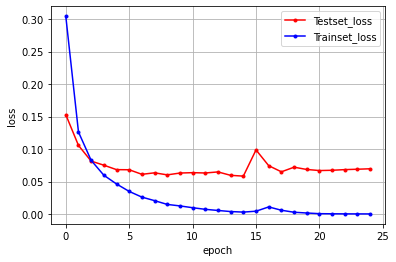

In [ ]:
#Showing on Graph
y_vloss=history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()